<img src="https://www.dropbox.com/s/l93ecugg1jbtjiw/fga.png?raw=1" width="1200" height="400">
<ul>
    <li> <b>Campus UnB Gama</b> </li>
    <li> <b>Disciplina: Processamento Digital de Sinais Financeiros</b> </li>
    <a href="https://www.linkedin.com/in/marcelino-andrade-b164b369/">
    <li> <b>Prof. Marcelino Monteiro de Andrade Dr.</b> </li>
</ul>


    Primeira (1/3) Atividade Prática Avaliativa
    Entrega da Atividade 27/07/2022 
    "A não entrega na data esperada reduz em 50% na nota da avaliação"


<div id="Tópicos">
    <h2>Questões</h2>
</div>


<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol> 
<li> Colete os preços e volumes de um conjunto de ativos durante o período de 10 (quinze) anos, pertencentes a no mínimo 5 (cinco) Índices de Segmentos e Setoriais diferentes na B3, e separe os 30 (cinquenta) ativos mais líquidos; </li><p></p>
    <li> Construa amostras de treinamento e outras de teste, sendo a primeira com os 3 (três) anos e a segunda com o último ano, e desloque as janelas anualmente (walk forward analysis); </li> <p></p>
    <li> Na amostra de treinamento, aplique uma clusterização não supervisionada (K-Means ou DBSCAN) e separe um ativo para cada clusters, com o critério que desejar (sugestão maior índice Sharpe); </li><p></p>
    <li> Aplique a Teoria do Portfolio Moderno de Markowitz nos ativos escolhidos no passo anterior, no sentido de alocar um capital de R$100.000,00; </li><p></p>
    <li> Verifique o resultado da alocação de capital com Markowitz nos ativos separados, na fase de treinamento, na amostra de teste que representa o último ano da aquisição e compare com o índice Bovespa; </li><p></p>
    <li> Descreva suas impressores relativas ao processo, baseado em números, e resultados encontrados. </li>
</ol>
</div>


### Questão 1:

In [88]:
def historicalDay(coin,yesterdayB,todayB):
    df = yf.download(coin, start=str(yesterdayB), end=str(todayB)) 
    return df

In [144]:
indice_list = ['IAGRO', 'IFNC', 'BDRX', 'ICON', 'IEE', 'IFIX', 'IFIL', 'IMAT', 'IDIV', 'INDX', 'IMOB', 'MLCX', 'SMLL', 'UTIL', 'IVBX', 'DI']

In [132]:
!pip3 install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
     --------------------------------------- 36.9/36.9 MB 13.6 MB/s eta 0:00:00


In [133]:
import pandas as pd
from numpy import nan
import yfinance as yf
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [66]:

base_link = 'http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?'

ativos_codes_dfs = []

for indice in indice_list:
    try:
        ativos_codes_dfs.append(pd.read_html(f"{base_link}Indice={indice}&idioma=pt-br")[0]['Código'])
        print(f'Download do indice: {indice}')
    except ValueError:
        print(f'Não foi possivel fazer o download do indice: {indice}')

Não foi possivel fazer o download do indice: IAGRO
Download do indice: IFNC
Download do indice: BDRX
Download do indice: ICON
Download do indice: IEE
Download do indice: IFIX
Não foi possivel fazer o download do indice: IFIX_L
Download do indice: IMAT
Download do indice: IDIV
Download do indice: INDX
Download do indice: IMOB
Download do indice: MLCX
Download do indice: SMLL
Download do indice: UTIL
Download do indice: IVBX
Não foi possivel fazer o download do indice: DI


In [68]:
ativos_codes_dfs.append(pd.read_csv('AGFSDia_04-07-22.csv', sep=';')['Codigo'])
ativos_codes_dfs.append(pd.read_csv('IFILDia_04-07-22.csv', sep=';')['Codigo'])

In [141]:
todos_cod_dos_ativos = {}

for indice in ativos_codes_dfs:
    for code in indice.values:
        if code == 'Quantidade Teórica Total  Redutor':
            continue
        try:
            todos_cod_dos_ativos[code] = todos_cod_dos_ativos[code] + 1
        except KeyError:
            todos_cod_dos_ativos[code] = 1
total = 0

todayB = dt.date.today()
yesterdayB = todayB - dt.timedelta(days=11*365)
print(todayB,yesterdayB)

ativos_historical_data_dfs = []

outOpen, outHigh, outLow, outClose, outVolume = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()
cols=[]

for cod in tqdm(todos_cod_dos_ativos):
    if todos_cod_dos_ativos[cod] >= 5:
        try:
            tmp_df = historicalDay(f'{cod}.SA', yesterdayB, todayB)

            dfOutOpen    = tmp_df['Open']
            dfOutClose   = tmp_df['Close']
            dfOutHigh    = tmp_df['High']
            dfOutLow     = tmp_df['Low']
            dfOutVolume  = tmp_df['Volume']

            outOpen   = pd.concat([outOpen, dfOutOpen], axis=1)
            outClose  = pd.concat([outClose, dfOutClose], axis=1)
            outHigh   = pd.concat([outHigh, dfOutHigh], axis=1)
            outLow    = pd.concat([outLow, dfOutLow], axis=1)
            outVolume = pd.concat([outVolume, dfOutVolume], axis=1)

            cols.append(cod)
        except:
            print(f'Error: {cod}')

outOpen.columns=cols
outClose.columns=cols
outHigh.columns=cols
outLow.columns=cols
outVolume.columns=cols       
        
# your_list = ["a", "b", "a", "c", "c", "a", "c"]
# dict_of_counts = {item:your_list.count(item) for item in your_list}
# print(dict_of_counts)

2022-07-02 2011-07-05


  0%|                                                                                                                                                                        | 0/424 [00:00<?, ?it/s]

[*********************100%***********************]  1 of 1 completed

 39%|█████████████████████████████████████████████████████████████▍                                                                                               | 166/424 [00:00<00:01, 193.70it/s]


[*********************100%***********************]  1 of 1 completed

 44%|████████████████████████████████████████████████████████████████████▊                                                                                        | 186/424 [00:01<00:02, 110.13it/s]


[*********************100%***********************]  1 of 1 completed

 46%|█████████████████████████████████████████████████████████████████████████                                                                                     | 196/424 [00:02<00:03, 68.79it/s]


[*********************100%***********************]  1 of 1 completed

 51%|████████████████████████████████████████████████████████████████████████████████▍                                                                             | 216/424 [00:02<00:04, 50.60it/s]


[*********************100%***********************]  1 of 1 completed

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 321/424 [00:03<00:01, 76.90it/s]


[*********************100%***********************]  1 of 1 completed

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 424/424 [00:04<00:00, 94.04it/s]

<AxesSubplot:>

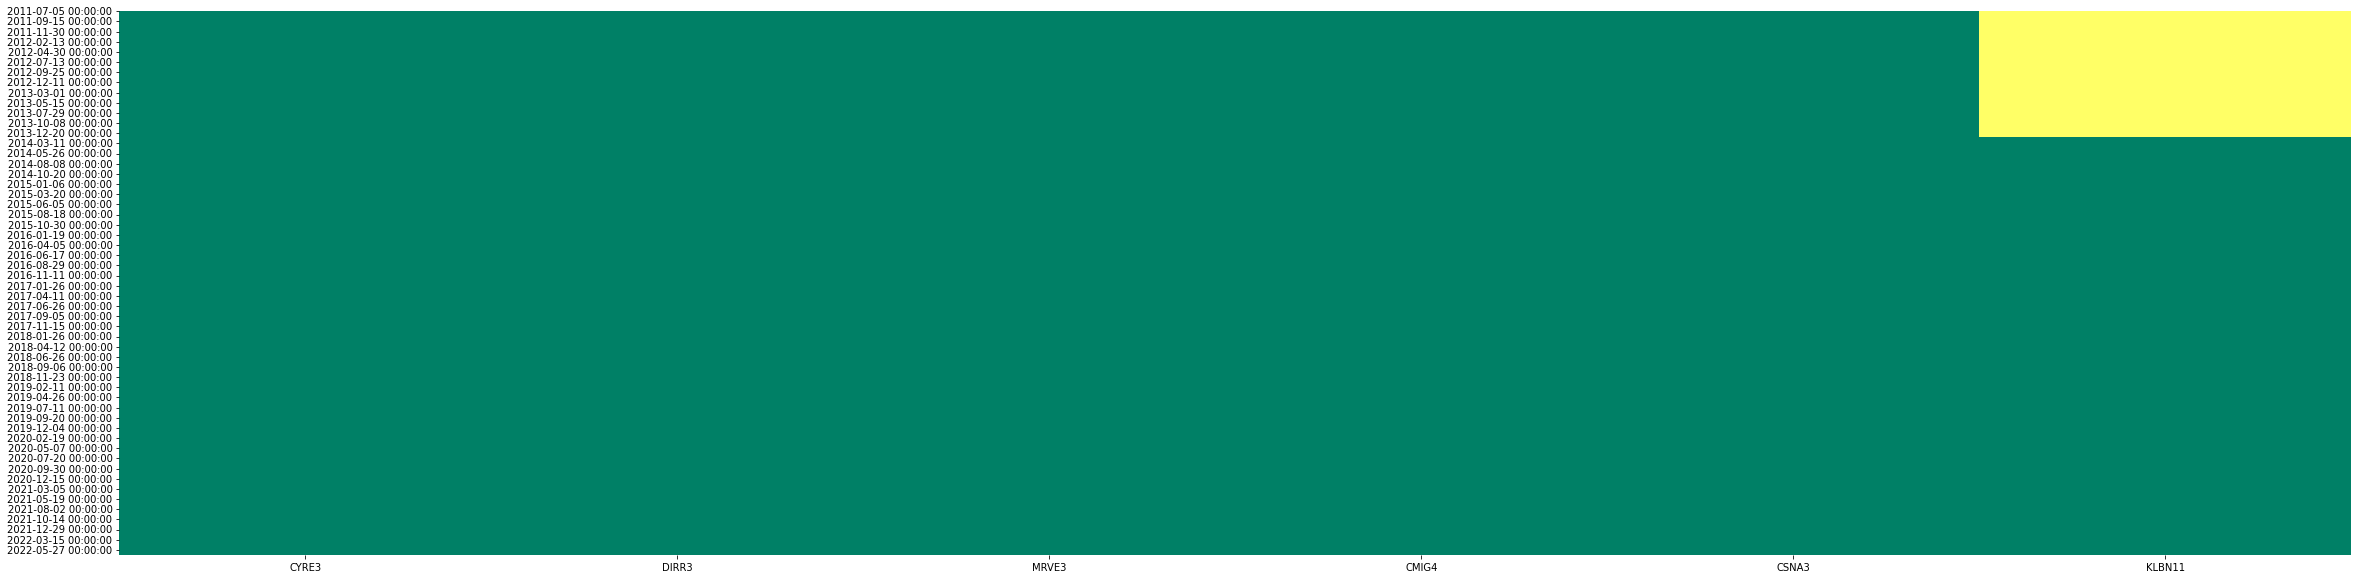

In [142]:
output=outVolume.copy()

plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')

In [143]:
len(output.columns)

6

In [139]:
medias_dos_volumes_de_cada_ativo = {}

for cod, ativo_df in zip(todos_cod_dos_ativos, ativos_historical_data_dfs):
    medias_dos_volumes_de_cada_ativo[cod] = ativo_df['Volume'].mean(axis=0)
    
sorted(medias_dos_volumes_de_cada_ativo.items(), key= lambda x:x[1], reverse=True)

[]

In [124]:
ativos_historical_data_dfs[0]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-04-29,16.950001,16.950001,16.100000,16.600000,9.064987,85582800
2013-04-30,16.600000,17.080000,16.600000,17.049999,9.310722,26950200
2013-05-02,17.000000,17.500000,16.980000,17.500000,9.556459,16057200
2013-05-03,17.420000,17.850000,17.370001,17.750000,9.692982,13031000
2013-05-06,17.750000,17.990000,17.639999,17.930000,9.791277,19911900
...,...,...,...,...,...,...
2022-06-27,24.690001,25.200001,24.590000,24.920000,24.920000,3385000
2022-06-28,25.410000,25.770000,25.139999,25.450001,25.450001,4885100
2022-06-29,25.510000,26.100000,25.440001,25.480000,25.480000,5616100


In [ ]:
a = [1, 2, 3, 4]
b = ['a', 'b', 'c', 'd']

for i in zip(a, b):
    print(i)

(1, 'a')
(2, 'b')
(3, 'c')
(4, 'd')


### Questão 2: 

### Questão 3: 

### Questão 4: 

### Questão 5: 

### Questão 6: 